# Urban DataMart Exploration for Chicago, IL

In [245]:
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import pyproj

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [208]:
# For transforming lon/lat coordinates to x/y coordinate in feet suitable for Illinois
# https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset
# EPSG:4326 - https://epsg.io/4326
# EPSG:26971 - https://epsg.io/26971
transformer_ll_to_xy = pyproj.Transformer.from_crs('EPSG:4326', 'EPSG:26971', always_xy=True)

CHICAGO_LON = -87.623177
CHICAGO_LAT = 41.881832
CHICAGO_X, CHICAGO_Y = transformer_ll_to_xy.transform(CHICAGO_LON, CHICAGO_LAT)

GARY_LON = -87.356934
GARY_LAT = 41.595161
GARY_X, GARY_Y = transformer_ll_to_xy.transform(GARY_LON, GARY_LAT)

NAPERVILLE_LON = -88.186111
NAPERVILLE_LAT = 41.748489
NAPERVILLE_X, NAPERVILLE_Y = transformer_ll_to_xy.transform(NAPERVILLE_LON, NAPERVILLE_LAT)

WAUKEGEN_LON = -87.872139
WAUKEGEN_LAT = 42.365627
WAUKEGEN_X, WAUKEGEN_Y = transformer_ll_to_xy.transform(WAUKEGEN_LON, WAUKEGEN_LAT)

## Load Source Tables

The `ID_PLOT` table contains information about the locations or plots where trees are surveyed. This data include approximate locations.

In [3]:
df_id_plot = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/ID_PLOT.csv')
print('Records:', len(df_id_plot))
print('Columns:', list(df_id_plot.columns))
df_id_plot[:1]

Records: 583
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'INTENSITY', 'MEAS_YEAR', 'MEAS_MONTH', 'MEAS_DAY', 'KINDCD', 'PLOT_STATUS_CD', 'PLOT_NONSAMPLE_REASN_CD', 'SAMPLE_METHOD_CD', 'MANUAL_NATIONAL', 'MANUAL_REGIONAL', 'LAT', 'LON', 'ROAD_DIST_CD', 'WATER_CD', 'SUBP_EXAMINE_CD', 'CN', 'PREV_PLT_CN']


,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,INTENSITY,MEAS_YEAR,MEAS_MONTH,MEAS_DAY,KINDCD,PLOT_STATUS_CD,PLOT_NONSAMPLE_REASN_CD,SAMPLE_METHOD_CD,MANUAL_NATIONAL,MANUAL_REGIONAL,LAT,LON,ROAD_DIST_CD,WATER_CD,SUBP_EXAMINE_CD,CN,PREV_PLT_CN
0,1469468,1,55,5,59,22287,5,2017,6,29,1,2,NaN,NaN,7.1,7.1,42.550977,-88.259189,NaN,NaN,1,923674,NaN


The `ID_TREE` table contains information about individual trees.

In [4]:
df_id_tree = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/ID_TREE.csv')
print('Records:', len(df_id_tree))
print('Columns:', list(df_id_tree.columns))
df_id_tree[:1]

Records: 2138
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN


The `REF_PLANT_DICTIONARY` table contains information about plant species as defined by the Natural Resources Conservation Service (NRCS) for the PLANTS database (see also https://plants.usda.gov).

In [5]:
df_ref_plant_dictionary = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_PLANT_DICTIONARY.csv', low_memory=False)
print('Records:', len(df_ref_plant_dictionary))
print('Columns:', list(df_ref_plant_dictionary.columns))
df_ref_plant_dictionary[:1]

Records: 81489
Columns: ['CN', 'SYMBOL_TYPE', 'SYMBOL', 'SCIENTIFIC_NAME', 'NEW_SYMBOL', 'NEW_SCIENTIFIC_NAME', 'COMMON_NAME', 'CATEGORY', 'FAMILY', 'GROWTH_HABIT', 'DURATION', 'US_NATIVITY', 'STATE_DISTRIBUTION', 'STATE_AND_PROVINCE', 'SCIENTIFIC_NAME_W_AUTHOR', 'GENERA_BINOMIAL_AUTHOR', 'TRINOMIAL_AUTHOR', 'QUADRINOMIAL_AUTHOR', 'XGENUS', 'GENUS', 'XSPECIES', 'SPECIES', 'SSP', 'XSUBSPECIES', 'SUBSPECIES', 'VAR', 'XVARIETY', 'VARIETY', 'SUBVAR', 'SUBVARIETY', 'F', 'FORMA', 'NOTES', 'CREATED_BY', 'CREATED_DATE', 'CREATED_IN_INSTANCE', 'MODIFIED_BY', 'MODIFIED_DATE', 'MODIFIED_IN_INSTANCE']


,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE
0,503517201126144,Old,NOFR3,Nothoscordum fragrans,NOBO,Nothoscordum borbonicum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothoscordum fragrans auct. non (Vent.) Kunth,auct. non (Vent.) Kunth,NaN,NaN,NaN,Nothoscordum,NaN,fragrans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 12:59:36,126144,ERICHDODSON,2018-02-12 11:12:26,126144.0


The `REF_SPECIES` table contains a reference of species codes in the `SPCD` column.

In [6]:
df_ref_species = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_SPECIES.csv')
print('Records:', len(df_ref_species))
print('Columns:', list(df_ref_species.columns))
df_ref_species[:1]

Records: 2697
Columns: ['SPCD', 'COMMON_NAME', 'SHARED_COMMON_NAME_IND', 'GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES', 'SCIENTIFIC_NAME', 'SPECIES_SYMBOL', 'E_SPGRPCD', 'W_SPGRPCD', 'C_SPGRPCD', 'P_SPGRPCD', 'MAJOR_SPGRPCD', 'STOCKING_SPGRPCD', 'FOREST_TYPE_SPGRPCD', 'JENKINS_SPGRPCD', 'JENKINS_SAPLING_ADJUSTMENT', 'SITETREE', 'SFTWD_HRDWD', 'WOODLAND', 'WOOD_SPGR_GREENVOL_DRYWT', 'WOOD_SPGR_GREENVOL_DRYWT_CIT', 'BARK_SPGR_GREENVOL_DRYWT', 'BARK_SPGR_GREENVOL_DRYWT_CIT', 'MC_PCT_GREEN_WOOD', 'MC_PCT_GREEN_WOOD_CIT', 'MC_PCT_GREEN_BARK', 'MC_PCT_GREEN_BARK_CIT', 'BARK_VOL_PCT', 'BARK_VOL_PCT_CIT', 'CWD_DECAY_RATIO1', 'CWD_DECAY_RATIO2', 'CWD_DECAY_RATIO3', 'CWD_DECAY_RATIO4', 'CWD_DECAY_RATIO5', 'DWM_CARBON_RATIO', 'CARBON_RATIO_LIVE', 'DRYWT_TO_GREENWT_CONVERSION', 'CREATED_DATE', 'MODIFIED_DATE']


,SPCD,COMMON_NAME,SHARED_COMMON_NAME_IND,GENUS,SPECIES,VARIETY,SUBSPECIES,SCIENTIFIC_NAME,SPECIES_SYMBOL,E_SPGRPCD,W_SPGRPCD,C_SPGRPCD,P_SPGRPCD,MAJOR_SPGRPCD,STOCKING_SPGRPCD,FOREST_TYPE_SPGRPCD,JENKINS_SPGRPCD,JENKINS_SAPLING_ADJUSTMENT,SITETREE,SFTWD_HRDWD,WOODLAND,WOOD_SPGR_GREENVOL_DRYWT,WOOD_SPGR_GREENVOL_DRYWT_CIT,BARK_SPGR_GREENVOL_DRYWT,BARK_SPGR_GREENVOL_DRYWT_CIT,MC_PCT_GREEN_WOOD,MC_PCT_GREEN_WOOD_CIT,MC_PCT_GREEN_BARK,MC_PCT_GREEN_BARK_CIT,BARK_VOL_PCT,BARK_VOL_PCT_CIT,CWD_DECAY_RATIO1,CWD_DECAY_RATIO2,CWD_DECAY_RATIO3,CWD_DECAY_RATIO4,CWD_DECAY_RATIO5,DWM_CARBON_RATIO,CARBON_RATIO_LIVE,DRYWT_TO_GREENWT_CONVERSION,CREATED_DATE,MODIFIED_DATE
0,6012,spineless wattle,N,Acacia,muricata,NaN,NaN,Acacia muricata,ACMU,54.0,54.0,54.0,NaN,3,37.0,227.0,8,0.84031,NaN,H,N,0.52,26.0,0.53,26.0,75.13,26.0,80.49,26.0,15.16,26.0,1.0,0.78,0.45,0.42,0.42,0.491,0.475,1.758474,2021-09-03 22:38:53,NaN


The `REF_TREE_STATUS` table stores reference data for the `STATUSCD` attribute in the `ID_MOTHER_TREE` and `ID_TREE` tables. Code for this attribute indicates the status of a tree at the time of measurement.

In [7]:
TREE_STATUS_LIVE = 1
TREE_STATUS_DEAD = 2

df_ref_tree_status = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_TREE_STATUS.csv')
print('Records:', len(df_ref_tree_status))
print('Columns:', list(df_ref_tree_status.columns))
df_ref_tree_status

Records: 5
Columns: ['VALUE', 'ABBR', 'MEANING', 'RETIRED']


,VALUE,ABBR,MEANING,RETIRED
0,0,No Status,No status – tree is not presently in the sample (remeasurement plots only).,N
1,1,Live,Live tree,N
2,2,Dead,Dead tree,N
3,3,Cut & Utilized,"Cut & Utilized – Collected on remeasurement trees only. A tree that occupied a forested condition in the previous inventory only. A tree that has been cut and removed by direct human activity related to harvesting, silviculture or land clearing. The tree is assumed to have been utilized for a commercial purposes, such as timber, chips, or firewood, and noncommercial purposes such as domestic firewood, landscaping, and fence posts.",N
4,4,Removed,"Removed – Collected on remeasurement trees only. A tree that has been removed by direct human activity but not likely utilized for a commercial product, such as timber, chips, or firewood, and noncommercial purposes such as domestic firewood, landscaping, and fence posts.",N


The `wcvp_taxon` table contains taxonomic information about vascular plants. Of interest to us are its trees.

In [8]:
df_wcvp_taxon = pd.read_csv('./data/wcvp_dwca/wcvp_taxon.csv', sep='|')
print('Records:', len(df_wcvp_taxon))
print('Columns:', list(df_wcvp_taxon.columns))
df_wcvp_taxon[:1]

Records: 1440076
Columns: ['taxonid', 'family', 'genus', 'specificepithet', 'infraspecificepithet', 'scientfiicname', 'scientfiicnameauthorship', 'taxonrank', 'taxonomicstatus', 'acceptednameusageid', 'parentnameusageid', 'originalnameusageid', 'namepublishedin', 'nomenclaturalstatus', 'taxonremarks', 'scientificnameid', 'dynamicproperties', 'references']


,taxonid,family,genus,specificepithet,infraspecificepithet,scientfiicname,scientfiicnameauthorship,taxonrank,taxonomicstatus,acceptednameusageid,parentnameusageid,originalnameusageid,namepublishedin,nomenclaturalstatus,taxonremarks,scientificnameid,dynamicproperties,references
0,3152367,Polypodiaceae,Elaphoglossum,pygmaeum,NaN,Elaphoglossum pygmaeum,(Mett.) Christ,Species,Accepted,3152367.0,3189746.0,3180440.0,Monogr. Elaphoglossum: 111 (1899),NaN,Colombia to Ecuador,ipni:17105050-1,"{""powoid"":""17105050-1"",""lifeform"":""epiphyte"",""climate"":""wet tropical"",""homotypicsynonym"":"""",""hybridformula"":"""",""reviewed"":""N""}",https://powo.science.kew.org/taxon/urn:lsid:ipni.org:names:17105050-1


The `wcvp_distribution` table contains information about the establishment means of plants in various locales.

In [9]:
df_wcvp_distribution = pd.read_csv('./data/wcvp_dwca/wcvp_distribution.csv', sep='|')
print('Records:', len(df_wcvp_distribution))
print('Columns:', list(df_wcvp_distribution.columns))
df_wcvp_distribution[:1]

Records: 1983653
Columns: ['coreid', 'locality', 'establishmentmeans', 'locationid', 'occurrencestatus', 'threatstatus']


,coreid,locality,establishmentmeans,locationid,occurrencestatus,threatstatus
0,1,Argentina Northeast,NaN,TDWG:AGE,NaN,NaN


## Data Filtering Methodology

<div style="display:none;">
```mermaid
graph
    df_id_tree --> df_id_tree_with_species
    df_ref_species -->|merge on SPCD, brings<br/>genus, species, variety,<br/>subspecies, common name| df_id_tree_with_species
    df_id_tree_with_species -->|filter to just trees that<br/>are alive and are<br/>individual trees| df_trees
    df_ref_plant_dictionary -->|filter to just current, species<br/>level records for Illinois| df_ref_plant_dictionary_illinois
    df_ref_plant_dictionary_illinois -->|determine nativity| df_ref_plant_dictionary_illinois_nativity
    df_trees --> df_trees_illinois
    df_ref_plant_dictionary_illinois_nativity -->|merge on genus, species,<br/>variety, and subspecies| df_illinois_nativity
    df_id_plot -->|integrate lat/lon<br/>and x/y| df_trees_chicago
    df_trees_illinois -->|manual inspection of<br/>nativity information for<br/>Chicago| df_trees_chicago
    df_illinois_nativity --> df_trees_illinois
    df_wcvp_taxon -->|filter to just accepted records<br/>and are species| df_wcvp_taxon_species
    df_wcvp_distribution -->|filter to just illinois| df_wcvp_distribution_illinois
    df_wcvp_taxon_species --> df_wcvp_taxon_species_illinois
    df_wcvp_distribution_illinois -->|merge on genus, species bring in<br/>establishmentmeans| df_wcvp_taxon_species_illinois
    df_wcvp_taxon_species_illinois -->|determine nativity| df_wcvp_taxon_species_illinois_nativity
    df_wcvp_taxon_species_illinois_nativity --> df_illinois_nativity
    style df_id_tree fill:LightBlue,stroke:SteelBlue
    style df_id_plot fill:LightBlue,stroke:SteelBlue
    style df_ref_species fill:LightBlue,stroke:SteelBlue
    style df_ref_plant_dictionary fill:LightBlue,stroke:SteelBlue
    style df_wcvp_taxon fill:LightBlue,stroke:SteelBlue
    style df_wcvp_distribution fill:LightBlue,stroke:SteelBlue
    style df_trees_chicago fill:PaleGreen,stroke:SeaGreen
```
</div>

![Filtering Methodology Diagram](./filtering_methodology_diagram.png)

## Data Filtering

In [10]:
df_id_tree_with_species = pd.merge(
    df_id_tree,
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES']],
    on='SPCD',
    how='left',
)
print('Records:', len(df_id_tree_with_species))
print('Columns:', list(df_id_tree_with_species.columns))
df_id_tree_with_species[:1]

Records: 2138
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN,American elm,Ulmus,americana,NaN,NaN


In [11]:
df_trees = df_id_tree_with_species[
    (df_id_tree_with_species['STATUSCD'] == TREE_STATUS_LIVE)  # Living.
    &(df_id_tree_with_species['TREE'] == df_id_tree_with_species['STEM'])  # Individual trees.
]
print('Records:', len(df_trees))
print('Columns:', list(df_trees.columns))
df_trees[:1]

Records: 1740
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN,American elm,Ulmus,americana,NaN,NaN


In [12]:
df_ref_plant_dictionary_illinois = df_ref_plant_dictionary[
    (df_ref_plant_dictionary['SYMBOL_TYPE'] == 'Species')  # Identifies a species and is not old.
    &(df_ref_plant_dictionary['STATE_DISTRIBUTION'].str.contains('IL', na=False, regex=False))  # Found in Illinois.
]
print('Records:', len(df_ref_plant_dictionary_illinois))
print('Columns:', list(df_ref_plant_dictionary_illinois.columns))
df_ref_plant_dictionary_illinois[:1]

Records: 4170
Columns: ['CN', 'SYMBOL_TYPE', 'SYMBOL', 'SCIENTIFIC_NAME', 'NEW_SYMBOL', 'NEW_SCIENTIFIC_NAME', 'COMMON_NAME', 'CATEGORY', 'FAMILY', 'GROWTH_HABIT', 'DURATION', 'US_NATIVITY', 'STATE_DISTRIBUTION', 'STATE_AND_PROVINCE', 'SCIENTIFIC_NAME_W_AUTHOR', 'GENERA_BINOMIAL_AUTHOR', 'TRINOMIAL_AUTHOR', 'QUADRINOMIAL_AUTHOR', 'XGENUS', 'GENUS', 'XSPECIES', 'SPECIES', 'SSP', 'XSUBSPECIES', 'SUBSPECIES', 'VAR', 'XVARIETY', 'VARIETY', 'SUBVAR', 'SUBVARIETY', 'F', 'FORMA', 'NOTES', 'CREATED_BY', 'CREATED_DATE', 'CREATED_IN_INSTANCE', 'MODIFIED_BY', 'MODIFIED_DATE', 'MODIFIED_IN_INSTANCE']


,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE
17,503517222126144,Species,NULU,Nuphar lutea,NaN,NaN,yellow pond-lily,Dicot,Nymphaeaceae,Forb/herb,Perennial,L48(N)AK(N)CAN(N)SPM(N),"AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY","CAN(AB, BC, LB, MB, NB, NF, NS, NT, NU, ON, PE, QC, SK, YT), FRA(SB), USA(AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY)",Nuphar lutea (L.) Sm.,(L.) Sm.,NaN,NaN,NaN,Nuphar,NaN,lutea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 12:59:36,126144,ERICHDODSON,2018-02-12 11:12:26,126144.0


In [13]:
df_ref_plant_dictionary_illinois_nativity = df_ref_plant_dictionary_illinois.copy()
df_ref_plant_dictionary_illinois_nativity['NATIVITY'] = (
    (
        (df_ref_plant_dictionary_illinois['US_NATIVITY'].str.contains('L48(N', na=False, regex=False))  # Native or pobably native in lower 48.
        &(~df_ref_plant_dictionary_illinois['US_NATIVITY'].str.contains('IL(I', na=False, regex=False))  # Not invasive in Illinois.
    )
    |(df_ref_plant_dictionary_illinois['US_NATIVITY'].str.contains('IL(N', na=False, regex=False))  # Native or probably native in Illinois.
).map({True: 'native', False: 'non-native'})
df_ref_plant_dictionary_illinois_nativity['NATIVITY'] = df_ref_plant_dictionary_illinois_nativity['NATIVITY'].fillna('non-native')
print('Records:', len(df_ref_plant_dictionary_illinois_nativity))
print('Columns:', list(df_ref_plant_dictionary_illinois_nativity.columns))
df_ref_plant_dictionary_illinois_nativity[:1]

Records: 4170
Columns: ['CN', 'SYMBOL_TYPE', 'SYMBOL', 'SCIENTIFIC_NAME', 'NEW_SYMBOL', 'NEW_SCIENTIFIC_NAME', 'COMMON_NAME', 'CATEGORY', 'FAMILY', 'GROWTH_HABIT', 'DURATION', 'US_NATIVITY', 'STATE_DISTRIBUTION', 'STATE_AND_PROVINCE', 'SCIENTIFIC_NAME_W_AUTHOR', 'GENERA_BINOMIAL_AUTHOR', 'TRINOMIAL_AUTHOR', 'QUADRINOMIAL_AUTHOR', 'XGENUS', 'GENUS', 'XSPECIES', 'SPECIES', 'SSP', 'XSUBSPECIES', 'SUBSPECIES', 'VAR', 'XVARIETY', 'VARIETY', 'SUBVAR', 'SUBVARIETY', 'F', 'FORMA', 'NOTES', 'CREATED_BY', 'CREATED_DATE', 'CREATED_IN_INSTANCE', 'MODIFIED_BY', 'MODIFIED_DATE', 'MODIFIED_IN_INSTANCE', 'NATIVITY']


,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE,NATIVITY
17,503517222126144,Species,NULU,Nuphar lutea,NaN,NaN,yellow pond-lily,Dicot,Nymphaeaceae,Forb/herb,Perennial,L48(N)AK(N)CAN(N)SPM(N),"AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY","CAN(AB, BC, LB, MB, NB, NF, NS, NT, NU, ON, PE, QC, SK, YT), FRA(SB), USA(AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY)",Nuphar lutea (L.) Sm.,(L.) Sm.,NaN,NaN,NaN,Nuphar,NaN,lutea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 12:59:36,126144,ERICHDODSON,2018-02-12 11:12:26,126144.0,native


In [14]:
df_wcvp_taxon_species = df_wcvp_taxon[
    (df_wcvp_taxon['taxonomicstatus'] == 'Accepted')
    &(df_wcvp_taxon['taxonrank'] == 'Species')
]
print('Records:', len(df_wcvp_taxon_species))
print('Columns:', list(df_wcvp_taxon_species.columns))
df_wcvp_taxon_species[:1]

Records: 362754
Columns: ['taxonid', 'family', 'genus', 'specificepithet', 'infraspecificepithet', 'scientfiicname', 'scientfiicnameauthorship', 'taxonrank', 'taxonomicstatus', 'acceptednameusageid', 'parentnameusageid', 'originalnameusageid', 'namepublishedin', 'nomenclaturalstatus', 'taxonremarks', 'scientificnameid', 'dynamicproperties', 'references']


,taxonid,family,genus,specificepithet,infraspecificepithet,scientfiicname,scientfiicnameauthorship,taxonrank,taxonomicstatus,acceptednameusageid,parentnameusageid,originalnameusageid,namepublishedin,nomenclaturalstatus,taxonremarks,scientificnameid,dynamicproperties,references
0,3152367,Polypodiaceae,Elaphoglossum,pygmaeum,NaN,Elaphoglossum pygmaeum,(Mett.) Christ,Species,Accepted,3152367.0,3189746.0,3180440.0,Monogr. Elaphoglossum: 111 (1899),NaN,Colombia to Ecuador,ipni:17105050-1,"{""powoid"":""17105050-1"",""lifeform"":""epiphyte"",""climate"":""wet tropical"",""homotypicsynonym"":"""",""hybridformula"":"""",""reviewed"":""N""}",https://powo.science.kew.org/taxon/urn:lsid:ipni.org:names:17105050-1


In [15]:
df_wcvp_distribution_illinois = df_wcvp_distribution[
    df_wcvp_distribution['locality'] == 'Illinois'
]
print('Records:', len(df_wcvp_distribution_illinois))
print('Columns:', list(df_wcvp_distribution_illinois.columns))
df_wcvp_distribution_illinois[:1]

Records: 5216
Columns: ['coreid', 'locality', 'establishmentmeans', 'locationid', 'occurrencestatus', 'threatstatus']


,coreid,locality,establishmentmeans,locationid,occurrencestatus,threatstatus
155,126,Illinois,NaN,TDWG:ILL,NaN,NaN


In [16]:
df_wcvp_taxon_species_illinois = df_wcvp_taxon_species.merge(
    df_wcvp_distribution_illinois[['coreid', 'establishmentmeans']],
    left_on=['taxonid'],
    right_on=['coreid'],
)
df_wcvp_taxon_species_illinois = df_wcvp_taxon_species_illinois.drop('coreid', axis=1)
print('Records:', len(df_wcvp_taxon_species_illinois))
print('Columns:', list(df_wcvp_taxon_species_illinois.columns))
df_wcvp_taxon_species_illinois[:1]

Records: 3350
Columns: ['taxonid', 'family', 'genus', 'specificepithet', 'infraspecificepithet', 'scientfiicname', 'scientfiicnameauthorship', 'taxonrank', 'taxonomicstatus', 'acceptednameusageid', 'parentnameusageid', 'originalnameusageid', 'namepublishedin', 'nomenclaturalstatus', 'taxonremarks', 'scientificnameid', 'dynamicproperties', 'references', 'establishmentmeans']


,taxonid,family,genus,specificepithet,infraspecificepithet,scientfiicname,scientfiicnameauthorship,taxonrank,taxonomicstatus,acceptednameusageid,parentnameusageid,originalnameusageid,namepublishedin,nomenclaturalstatus,taxonremarks,scientificnameid,dynamicproperties,references,establishmentmeans
0,2639317,Apiaceae,Angelica,venenosa,NaN,Angelica venenosa,(Greenway) Fernald,Species,Accepted,2639317.0,2638971.0,2720773.0,Rhodora 45: 301 (1943),NaN,NC. & E. U.S.A.,ipni:13671-2,"{""powoid"":""13671-2"",""lifeform"":""perennial"",""climate"":""temperate"",""homotypicsynonym"":"""",""hybridformula"":"""",""reviewed"":""N""}",https://powo.science.kew.org/taxon/urn:lsid:ipni.org:names:13671-2,NaN


In [17]:
df_wcvp_taxon_species_illinois_nativity = df_wcvp_taxon_species_illinois

df_wcvp_taxon_species_illinois_nativity['nativity'] = df_wcvp_taxon_species_illinois_nativity['establishmentmeans'].map({ 'introduced': 'non-native' })
df_wcvp_taxon_species_illinois_nativity['nativity'] = df_wcvp_taxon_species_illinois_nativity['nativity'].fillna('native')
df_wcvp_taxon_species_illinois_nativity = df_wcvp_taxon_species_illinois_nativity.drop('establishmentmeans', axis=1)
print('Records:', len(df_wcvp_taxon_species_illinois_nativity))
print('Columns:', list(df_wcvp_taxon_species_illinois_nativity.columns))
df_wcvp_taxon_species_illinois_nativity[['nativity']].value_counts(dropna=False)

Records: 3350
Columns: ['taxonid', 'family', 'genus', 'specificepithet', 'infraspecificepithet', 'scientfiicname', 'scientfiicnameauthorship', 'taxonrank', 'taxonomicstatus', 'acceptednameusageid', 'parentnameusageid', 'originalnameusageid', 'namepublishedin', 'nomenclaturalstatus', 'taxonremarks', 'scientificnameid', 'dynamicproperties', 'references', 'nativity']


nativity  
native        2317
non-native    1033
Name: count, dtype: int64

In [18]:
# `NATIVITY` is from df_ref_plant_dictionary_illinois_nativity
# `nativity` is from df_wcvp_taxon_species_illinois_nativity
df_illinois_nativity = df_ref_plant_dictionary_illinois_nativity.merge(
    df_wcvp_taxon_species_illinois_nativity[['genus', 'specificepithet', 'nativity']],
    left_on=['GENUS', 'SPECIES'],
    right_on=['genus', 'specificepithet'],
)
df_illinois_nativity = df_illinois_nativity.drop('genus', axis=1)
df_illinois_nativity = df_illinois_nativity.drop('specificepithet', axis=1)
df_illinois_nativity = df_illinois_nativity.drop('NATIVITY', axis=1)
df_illinois_nativity = df_illinois_nativity.rename(columns={
    'nativity': 'NATIVITY',
})
print('Records:', len(df_illinois_nativity))
print('Columns:', list(df_illinois_nativity.columns))
df_illinois_nativity[:1]

Records: 3495
Columns: ['CN', 'SYMBOL_TYPE', 'SYMBOL', 'SCIENTIFIC_NAME', 'NEW_SYMBOL', 'NEW_SCIENTIFIC_NAME', 'COMMON_NAME', 'CATEGORY', 'FAMILY', 'GROWTH_HABIT', 'DURATION', 'US_NATIVITY', 'STATE_DISTRIBUTION', 'STATE_AND_PROVINCE', 'SCIENTIFIC_NAME_W_AUTHOR', 'GENERA_BINOMIAL_AUTHOR', 'TRINOMIAL_AUTHOR', 'QUADRINOMIAL_AUTHOR', 'XGENUS', 'GENUS', 'XSPECIES', 'SPECIES', 'SSP', 'XSUBSPECIES', 'SUBSPECIES', 'VAR', 'XVARIETY', 'VARIETY', 'SUBVAR', 'SUBVARIETY', 'F', 'FORMA', 'NOTES', 'CREATED_BY', 'CREATED_DATE', 'CREATED_IN_INSTANCE', 'MODIFIED_BY', 'MODIFIED_DATE', 'MODIFIED_IN_INSTANCE', 'NATIVITY']


,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE,NATIVITY
0,503517906126144,Species,OELI,Oenothera linifolia,NaN,NaN,threadleaf evening primrose,Dicot,Onagraceae,Forb/herb,Annual,L48(N),"AL, AR, FL, GA, IL, KS, KY, LA, MO, MS, NC, OK, SC, TN, TX, VA","USA(AL, AR, FL, GA, IL, KS, KY, LA, MO, MS, NC, OK, SC, TN, TX, VA)",Oenothera linifolia Nutt.,Nutt.,NaN,NaN,NaN,Oenothera,NaN,linifolia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 12:59:41,126144,ERICHDODSON,2018-02-12 11:12:25,126144.0,native


In [19]:
# TODO - build this next
df_trees_illinois = df_trees.merge(
    df_illinois_nativity[['GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES', 'NATIVITY']],
    on=['GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES'],
    how='left',
)
df_trees_illinois['NATIVITY'] = df_trees_illinois['NATIVITY'].fillna('non-native')
print('Records:', len(df_trees_illinois))
print('Columns:', list(df_trees_illinois.columns))
df_trees_illinois[:1]

Records: 1740
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES,NATIVITY
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN,American elm,Ulmus,americana,NaN,NaN,native


In [20]:
df_trees_chicago = df_trees_illinois.merge(
    df_id_plot[['PLOTID', 'LAT', 'LON']],
    on=['PLOTID'],
)
df_trees_chicago[['X', 'Y']] = df_trees_chicago.apply(lambda row: transformer_ll_to_xy.transform(row['LON'], row['LAT']), axis=1, result_type='expand')

## Questions and Answers

### Which tree species are are represented in the tree dataset for Chicago?

In [21]:
df_trees_chicago[['GENUS', 'SPECIES', 'COMMON_NAME', 'NATIVITY']].value_counts(dropna=False)

GENUS         SPECIES        COMMON_NAME               NATIVITY  
Rhamnus       cathartica     common buckthorn          non-native    210
Acer          saccharinum    silver maple              native        177
Morus         alba           white mulberry            non-native    133
Populus       deltoides      eastern cottonwood        native        121
Acer          platanoides    Norway maple              non-native    106
              negundo        boxelder                  native         91
Prunus        serotina       black cherry              native         86
Ulmus         americana      American elm              native         75
Gleditsia     triacanthos    honeylocust               native         61
Tilia         americana      American basswood         native         59
Fraxinus      pennsylvanica  green ash                 native         48
Ulmus         pumila         Siberian elm              non-native     46
Quercus       macrocarpa     bur oak                   nat

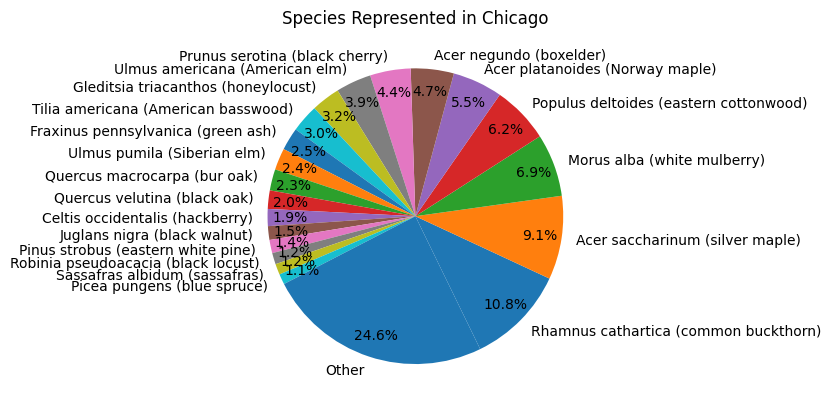

In [22]:
df = df_trees_chicago

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 22  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Species Represented in Chicago',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=-64,  # Determined by fiddling.
)
ax.set_ylabel('')
pass

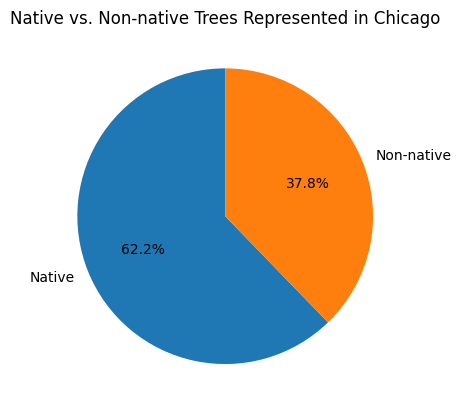

In [23]:
ax = df_trees_chicago['NATIVITY'].map({'native': 'Native', 'non-native': 'Non-native'}).value_counts().plot.pie(
    title = 'Native vs. Non-native Trees Represented in Chicago',
    autopct='%1.1f%%',
    startangle=90,
)
ax.set_ylabel('')
pass

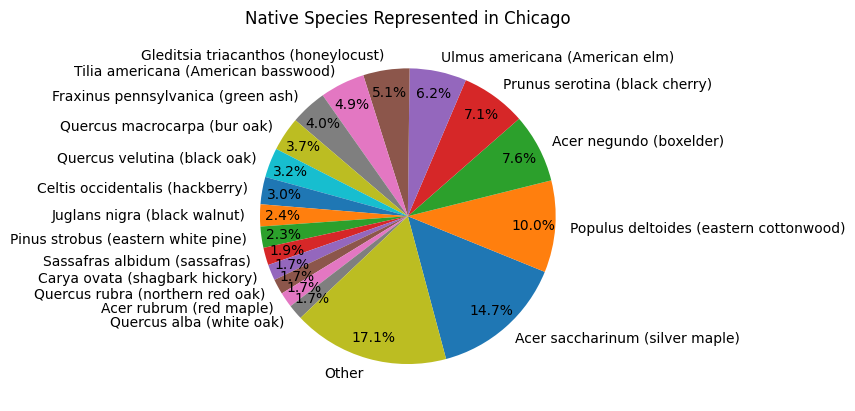

In [24]:
df = df_trees_chicago[df_trees_chicago['NATIVITY'] == 'native']

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 20  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Native Species Represented in Chicago',
    autopct='%1.1f%%',
    pctdistance=0.85,  # Determined by fiddling.
    startangle=-75,  # Determined by fiddling.
)
ax.set_ylabel('')
pass

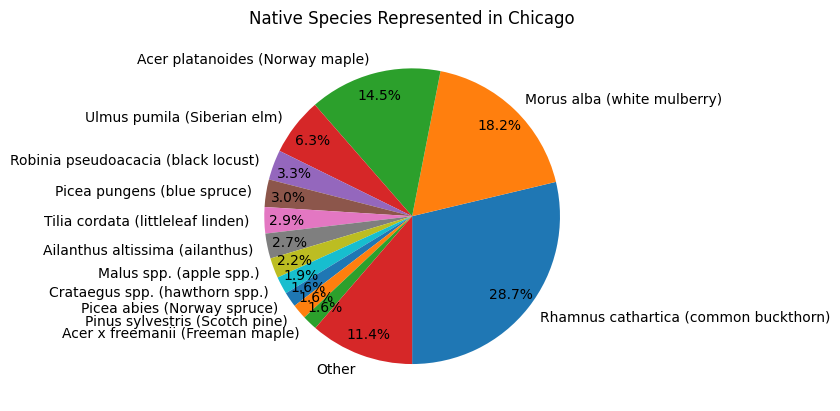

In [25]:
df = df_trees_chicago[df_trees_chicago['NATIVITY'] != 'native']

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 10  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Native Species Represented in Chicago',
    autopct='%1.1f%%',
    pctdistance=0.85,  # Determined by fiddling.
    startangle=-90,  # Determined by fiddling.
)
ax.set_ylabel('')
pass

### Where are the trees located?

In [337]:
def calculate_extents(df):
    return {
        "x_min": df['X'].min().item(),
        "x_max": df['X'].max().item(),
        "y_min": df['Y'].min().item(),
        "y_max": df['Y'].max().item(),
    }

def draw_heatmap(df, x_min=None, extents=None, n_bins=None, title=None, figsize=None):
    if extents is None:
        extents = calculate_extents(df)

    x_min = extents["x_min"]
    x_max = extents["x_max"]
    y_min = extents["y_min"]
    y_max = extents["y_max"]
    
    x_extent = x_max - x_min
    y_extent = y_max - y_min

    if n_bins is None:
        n_bins = 15
    bin_dim = x_extent / (n_bins + 1)  # feet per bin

    n_bins_x = n_bins
    n_bins_y = int(np.ceil(y_extent / bin_dim))

    dfbins = df.copy()
    dfbins['xbin'] = np.minimum(np.floor(((dfbins['X'] - x_min) / bin_dim)).astype(np.int64), n_bins_x - 1)
    dfbins['ybin'] = np.minimum(np.floor(((dfbins['Y'] - y_min) / bin_dim)).astype(np.int64), n_bins_y - 1)

    # y major indexing for this image
    heatmap_data = np.zeros((n_bins_y, n_bins_x), dtype=int)
    bin_counts = dfbins.groupby(['ybin', 'xbin']).size()
    for (ybin, xbin), count in bin_counts.items():
        if ybin >= 0 and ybin < n_bins_y and xbin >= 0 and xbin < n_bins_x:
            heatmap_data[ybin, xbin] = count

    if figsize is None:
        aspect_ratio = x_extent / y_extent
        figsize = (6, 6 / aspect_ratio)
    
    plt.figure(figsize=figsize)

    extent = [x_min, x_max, y_min, y_max]
    plt.imshow(heatmap_data, origin='lower', extent=extent, cmap='viridis')
    
    plt.colorbar(label='Number of Trees')
    if title is not None:
        plt.title(title)
    
    plt.show()

def draw_differential_map(df1, df2, x_min=None, extents=None, n_bins=None, title=None, figsize=None, label=None):
    if extents is None:
        extents = calculate_extents(pd.concat([df1, df2]))

    x_min = extents["x_min"]
    x_max = extents["x_max"]
    y_min = extents["y_min"]
    y_max = extents["y_max"]
    
    x_extent = x_max - x_min
    y_extent = y_max - y_min

    if n_bins is None:
        n_bins = 15
    bin_dim = x_extent / (n_bins + 1)  # feet per bin

    n_bins_x = n_bins
    n_bins_y = int(np.ceil(y_extent / (bin_dim + 1)))
    
    dfbins1 = df1.copy()
    dfbins1['xbin'] = np.floor(((dfbins1['X'] - x_min) / bin_dim)).astype(np.int64)
    dfbins1['ybin'] = np.floor(((dfbins1['Y'] - y_min) / bin_dim)).astype(np.int64)

    dfbins2 = df2.copy()
    dfbins2['xbin'] = np.floor(((dfbins2['X'] - x_min) / bin_dim)).astype(np.int64)
    dfbins2['ybin'] = np.floor(((dfbins2['Y'] - y_min) / bin_dim)).astype(np.int64)

    # y major indexing for this image
    biggest_count = 0
    heatmap_data = np.zeros((n_bins_y, n_bins_x), dtype=int)
    bin_counts = dfbins1.groupby(['ybin', 'xbin']).size()
    for (ybin, xbin), count in bin_counts.items():
        if ybin >= 0 and ybin < n_bins_y and xbin >= 0 and xbin < n_bins_x:
            heatmap_data[ybin, xbin] += count
            if count > biggest_count:
                biggest_count = count
    bin_counts = dfbins2.groupby(['ybin', 'xbin']).size()
    for (ybin, xbin), count in bin_counts.items():
        if ybin >= 0 and ybin < n_bins_y and xbin >= 0 and xbin < n_bins_x:
            heatmap_data[ybin, xbin] -= count
            if count > biggest_count:
                biggest_count = count

    if figsize is None:
        aspect_ratio = x_extent / y_extent
        figsize = (6, 6 / aspect_ratio)

    fig, ax = plt.subplots(figsize=figsize)

    extent = [x_min, x_max, y_min, y_max]
    im = ax.imshow(heatmap_data, origin='lower', extent=extent, cmap='seismic_r', vmin=-biggest_count, vmax=biggest_count)

    fig.colorbar(im, label='Number of Trees' if label is None else label)
    if title is not None:
        ax.set_title(title)
    
    plt.show()

extents_chicago = calculate_extents(df_trees_chicago)
def calculate_chicago_figsize(width):
    global extents_chicago
    aspect_ratio = (extents_chicago['x_max'] - extents_chicago['x_min']) / (extents_chicago['y_max'] - extents_chicago['y_min'])
    return (width, width / aspect_ratio)

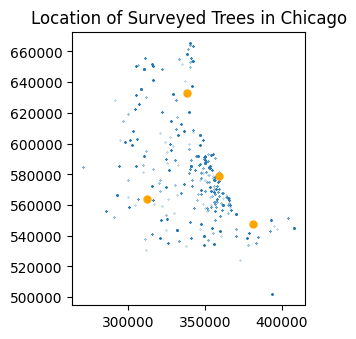

In [338]:
df = df_trees_chicago
plt.figure(figsize=calculate_chicago_figsize(3))
plt.scatter(df['X'], df['Y'], s=.05)
plt.scatter([CHICAGO_X], [CHICAGO_Y], s=25, c='orange')
plt.scatter([GARY_X], [GARY_Y], s=25, c='orange')
plt.scatter([NAPERVILLE_X], [NAPERVILLE_Y], s=25, c='orange')
plt.scatter([WAUKEGEN_X], [WAUKEGEN_Y], s=25, c='orange')
plt.axis('equal')
plt.title('Location of Surveyed Trees in Chicago')

plt.show()

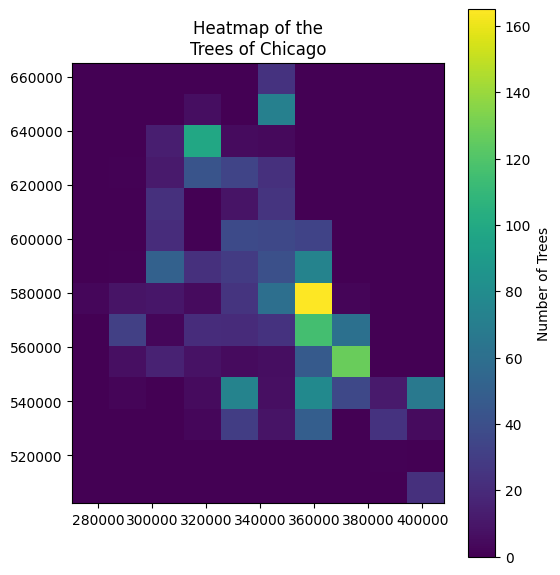

In [339]:
draw_heatmap(
    df_trees_chicago,
    extents=extents_chicago,
    title='Heatmap of the\nTrees of Chicago',
    n_bins=10,
)

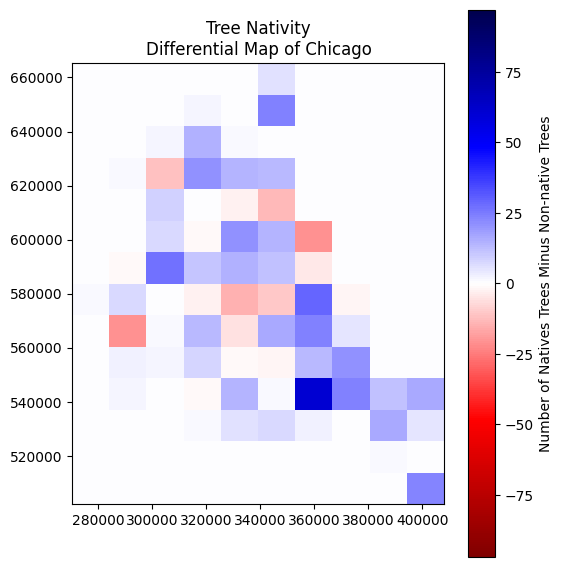

In [340]:
draw_differential_map(
    df_trees_chicago[
        (df_trees_chicago['NATIVITY'] == 'native')
    ],
    df_trees_chicago[
        (df_trees_chicago['NATIVITY'] != 'native')
    ],
    extents=extents_chicago,
    title='Tree Nativity\nDifferential Map of Chicago',
    label='Number of Natives Trees Minus Non-native Trees',
    n_bins=10,
)